In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [91]:
dfs = pd.read_csv('Dataframe.csv')
dfs2 = dfs.groupby(by='creationDate', sort=True)['requestAmount'].agg('sum')
dfs2

creationDate
1402-05-30     20918231338
1402-05-31    107335768668
1402-06-01     89425066314
1402-06-02      1783310080
1402-06-03       783271734
                  ...     
1403-03-23    210087467156
1403-03-24       437390053
1403-03-25       816620442
1403-03-26     48428832152
1403-03-27       631820229
Name: requestAmount, Length: 300, dtype: int64

In [72]:
df = pd.read_csv('Final Dataset.csv', low_memory=False)
df

,nationalCode,isPortfo,customerFullName,bourseAccountName,totalAssetValue,creditAssetValue,marginAccountValue,startingCredit,loanWithProfit,wltRemain,...,withoutActionDays,withoutActionBusinessDays,wltRemainToMarginAccount,lastRemainToMarginAccount,lastTransactionDate,branchName,warningCount,lastWarningDate,dbsAccountNumber,dlNumber
0,164-008217-4,1,حشمتي شربياني رضا,prx03328,54624134,0,0,0.0,0,265634,...,32.0,23,NaN,NaN,1402/04/31,هویزه,0,NaN,7.646184e+09,1016964
1,006-771639-3,1,شكري صومعه كبودين رقيه,prx04345,0,0,0,0.0,0,0,...,683.0,450,NaN,NaN,1400/07/17,هویزه,0,NaN,7.646188e+09,1016855
2,032-334800-9,1,رنج كش قاضي اميد,prx06043,59726104,59726104,35835662,0.0,0,0,...,11.0,9,0.0,0.0,1402/05/21,هویزه,0,NaN,7.646192e+09,1041717
3,001-033142-5,1,آراسته شراره,prx07836,0,0,0,0.0,0,0,...,11.0,9,NaN,NaN,1402/05/21,هویزه,0,NaN,7.646196e+09,1041639
4,003-385369-1,1,كتابي مسعود,prx13450,0,0,0,0.0,0,0,...,140.0,93,NaN,NaN,1402/01/16,آرارات,0,NaN,7.646209e+09,1053970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579494,031-227082-8,0,مبصر عليرضا,ع ش ك 60581,1000000,0,0,0.0,0,1000000,...,38.0,25,NaN,NaN,1402/09/22,کرج (بلوارامام رضا),0,NaN,7.649031e+13,1065661
2579495,556-103700-5,0,حاجي زاده اميرحسين,ع ض ف 13813,100000,0,0,0.0,0,100000,...,97.0,68,NaN,NaN,1402/07/23,اسلام شهر,0,NaN,7.649556e+13,1072075
2579496,428-585917-3,0,كريمي ناصر,كريـ68144,1088000000,0,0,0.0,0,1088000000,...,4.0,2,NaN,NaN,1402/10/26,اسلام شهر,0,NaN,7.649429e+13,1074961
2579497,032-151934-5,0,فرخي خانقاه شاهرخ,فرخـ01935,1000000,0,0,0.0,0,1000000,...,7.0,5,NaN,NaN,1402/10/23,جمهوری,0,NaN,7.649032e+13,1072558


In [98]:
sum_df = (df.groupby(by='lastTransactionDate', as_index=False, sort='lastTransactionDate')
          .sum(['wltRemain', 'lastRemain', 'periodChange']))
sum_df

,lastTransactionDate,isPortfo,totalAssetValue,creditAssetValue,marginAccountValue,startingCredit,loanWithProfit,wltRemain,wltRemainWithoutLoan,lastRemain,...,usableCredit,accountBaseUsableCredit,creditSettlement,withoutActionDays,withoutActionBusinessDays,wltRemainToMarginAccount,lastRemainToMarginAccount,warningCount,dbsAccountNumber,dlNumber
0,1395/10/05,0,0,0,0,0.000000e+00,0,0,0,0,...,0.000000e+00,0,0,75857.0,49824,0.00,0.00,0,2.371294e+15,31014539
1,1395/10/06,0,0,0,0,0.000000e+00,0,0,0,0,...,0.000000e+00,0,0,75826.0,49793,0.00,0.00,0,2.371291e+15,31010602
2,1395/10/07,0,0,0,0,0.000000e+00,0,0,0,0,...,0.000000e+00,0,0,75795.0,49762,0.00,0.00,0,2.371277e+15,31010478
3,1395/10/11,0,0,0,0,0.000000e+00,0,0,0,0,...,0.000000e+00,0,0,75671.0,49700,0.00,0.00,0,2.370884e+12,31020677
4,1395/10/12,0,0,0,0,0.000000e+00,0,0,0,0,...,0.000000e+00,0,0,75640.0,49669,0.00,0.00,0,2.371239e+15,31010788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,1402/11/26,0,229530731538,211027865683,130140900153,2.000000e+10,0,20404814189,20404814189,18245314355,...,3.824531e+10,148386214483,0,78.0,37,204.03,197.54,0,4.742444e+15,63493915
1723,1402/11/27,0,36172415437,30979546514,17207568924,0.000000e+00,0,7070746391,7070746391,5179431923,...,5.179432e+09,22387000844,0,10.0,10,56.50,54.26,0,1.453334e+15,19806756
1724,1402/11/28,35,10714505609970,10286377242133,6879290720483,1.223990e+12,0,318345291406,318345291406,404159959787,...,1.628150e+12,7283450679895,0,955.0,955,7802.91,11575.69,5,9.898165e+16,1384146666
1725,1402/11/29,27,6018290627285,5669569017818,3363755791075,1.763006e+11,0,158306979880,158306979880,264289506929,...,4.405901e+11,3628045297558,0,551.0,551,15698.86,17715.80,0,1.066303e+17,1471535538


In [73]:
chosen_col = ['lastRemain', 'wltRemain', 'periodChange',
              'withoutActionDays']
data = df[chosen_col]
data

,lastRemain,wltRemain,periodChange,withoutActionDays
0,265634,265634,0,32.0
1,0,0,0,683.0
2,0,0,0,11.0
3,0,0,0,11.0
4,0,0,0,140.0
...,...,...,...,...
2579494,1000000,1000000,0,38.0
2579495,100000,100000,0,97.0
2579496,1088000000,1088000000,0,4.0
2579497,1000000,1000000,0,7.0


In [74]:
data1 = data[data['wltRemain'] > 0]
data1

,lastRemain,wltRemain,periodChange,withoutActionDays
0,265634,265634,0,32.0
7,5881453,62189184,-56307731,0.0
9,716335,716335,0,32.0
13,26956855,26956855,0,694.0
14,10422118,10422118,0,2.0
...,...,...,...,...
2579494,1000000,1000000,0,38.0
2579495,100000,100000,0,97.0
2579496,1088000000,1088000000,0,4.0
2579497,1000000,1000000,0,7.0


In [75]:
data1['percent period'] = data1['periodChange'] / data1['wltRemain']
dt = data1[data1['percent period'] < 0]
mask = dt['percent period'] < -1
dt.loc[mask, 'percent period'] = -1.00
dt

C:\Users\erfan\AppData\Local\Temp\ipykernel_15256\3279012885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['percent period'] = data1['periodChange'] / data1['wltRemain']


,lastRemain,wltRemain,periodChange,withoutActionDays,percent period
7,5881453,62189184,-56307731,0.0,-0.905426
68,8226395,10750448,-2524053,1.0,-0.234786
236,301014499,308505043,-7490544,1.0,-0.024280
260,134508,35626145,-35491637,1.0,-0.996224
429,253933204,940700172,-686766968,0.0,-0.730059
...,...,...,...,...,...
2578915,52001820,52176659,-174839,0.0,-0.003351
2579157,182534212,320144831,-137610619,0.0,-0.429839
2579163,20765778,630763001,-609997223,0.0,-0.967078
2579258,603441,1603082187,-1602478746,0.0,-0.999624


In [76]:
dt.reset_index(inplace=True)
dt.drop(labels='index', inplace=True,  axis=1)
dt

C:\Users\erfan\AppData\Local\Temp\ipykernel_15256\651080451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.drop(labels='index', inplace=True,  axis=1)


,lastRemain,wltRemain,periodChange,withoutActionDays,percent period
0,5881453,62189184,-56307731,0.0,-0.905426
1,8226395,10750448,-2524053,1.0,-0.234786
2,301014499,308505043,-7490544,1.0,-0.024280
3,134508,35626145,-35491637,1.0,-0.996224
4,253933204,940700172,-686766968,0.0,-0.730059
...,...,...,...,...,...
132152,52001820,52176659,-174839,0.0,-0.003351
132153,182534212,320144831,-137610619,0.0,-0.429839
132154,20765778,630763001,-609997223,0.0,-0.967078
132155,603441,1603082187,-1602478746,0.0,-0.999624


In [77]:
np.corrcoef(dt['lastRemain'], dt['wltRemain'])

array([[1.        , 0.73144161],
       [0.73144161, 1.        ]])

In [78]:
np.corrcoef(dt['wltRemain'], dt['periodChange'])

array([[ 1.        , -0.50263987],
       [-0.50263987,  1.        ]])

In [79]:
y = dt['wltRemain']
x = dt[['periodChange', 'lastRemain']]

In [80]:
# plt.figure(figsize=(10, 6))
# plt.scatter(dt['periodChange'], dt['wltRemain'], alpha=0.5)
# plt.xlabel('Period Change')
# plt.ylabel('WLT Remain')
# plt.title('Scatter Plot of Period Change vs WLT Remain')
# plt.grid(True)
# 
# plt.figure(figsize=(10, 6))
# plt.scatter(dt['lastRemain'], dt['wltRemain'], alpha=0.5)
# plt.xlabel('Last Remain')
# plt.ylabel('WLT Remain')
# plt.title('Scatter Plot of Last Remain vs WLT Remain')
# plt.grid(True)
# 
# plt.show()

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [82]:
reg = LinearRegression()
reg.fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

array([2.28723800e+06, 3.80315900e+06, 5.91035430e+07, ...,
       4.21818830e+07, 1.02174292e+08, 1.08945700e+06])

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [84]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 7.842076132560743e-06
Mean Squared Error: 5.729067285530691e-09
R-squared: 1.0


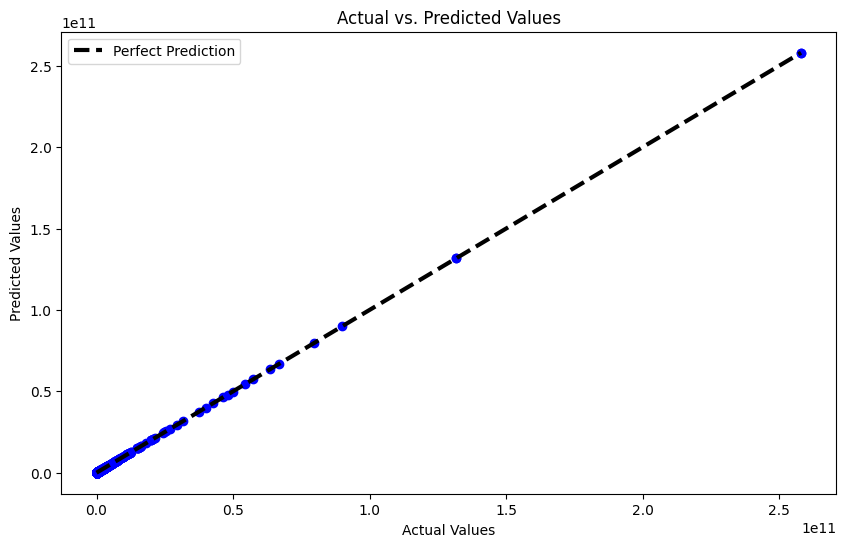

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()